# 4. Big 3 Serve Stats at their Favorite Slams

#### This notebook explores the average percentage of points won on 1st serve by the Big 3 (Nadal, Federer and Djokovic) at three Grand Slam Tournaments: Australian Open, Roland Garros and Wimbledon. Each one of the Big 3 has the record number of titles at one of these three tournaments. This notebook will explore their serve statistics at each of these tournaments and later on, will be compared to the average match winner's serve statistics on the same surface.

# Table of Content

## 1. Import Libraries and Data

## Step 2: Filter 
#### A. Tournament = Australian Open, French Open and Wimbledon
#### B. Player = One of the Big 3

## Step 3: Plot the Data
#### A. Line Chart
#### B. Bar Chart (This works better)

# 1. Import Libraries and Data

In [17]:
#Set Path
path = r'/Users/tristansavella/Desktop/Important Things/Data Analytics/CareerFoundry/Data Immersion/Achievement 6/Master Folder ATP/02 Data'

In [18]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy
import matplotlib

In [19]:
#Import df_matchstats
df_matchstats = pd.read_pickle(os.path.join(path, 'Prepared Data','df_matchstats.pkl'))

In [20]:
#Show all columns
pd.set_option('display.max_columns', None)

In [21]:
#Show all rows
pd.set_option('display.max_rows', None)

In [22]:
df_matchstats.head()

,tourney_id,Year,tourney_name,surface,tourney_level,winner_id,winner_ioc,winner_name,winner_age,winner_rank,winner_ht,loser_id,loser_ioc,loser_name,loser_rank,loser_ht,loser_age,best_of,round,minutes,w_#ServeGames,w_#aces,w_#dfs,w_#ServePoints,w_#1stServesIn,w_#2ndServePoints,w_%1stServesIn,w_#1stWon,w_%1stWon,w_#2ndWon,w_%2ndWon,w_bpSaved,w_#bpFaced,l_#ServeGames,l_#aces,l_#dfs,l_#ServePoints,l_#1stServesIn,l_#2ndServePoints,l_%1stServesIn,l_#1stWon,l_%1stWon,l_#2ndWon,l_%2ndWon,l_bpSaved,l_#bpFaced
119317,2000-301,2000,Auckland,Hard,A,103163,GER,Tommy Haas,21.7,11.0,188.0,101543,USA,Jeff Tarango,63.0,180.0,31.1,3,R32,108.0,17.0,18.0,4.0,96.0,49.0,47.0,51,39.0,79,28.0,59,3.0,5.0,17.0,7.0,8.0,106.0,55.0,51.0,51,39.0,70,29.0,56,4.0,7.0
119318,2000-301,2000,Auckland,Hard,A,102607,ESP,Juan Balcells,24.5,211.0,190.0,102644,ARG,Franco Squillari,49.0,183.0,24.3,3,R32,85.0,12.0,5.0,3.0,76.0,52.0,24.0,68,39.0,75,13.0,54,5.0,6.0,12.0,5.0,10.0,74.0,32.0,42.0,43,25.0,78,18.0,42,3.0,6.0
119319,2000-301,2000,Auckland,Hard,A,103252,ESP,Alberto Martin,21.3,48.0,175.0,102238,ESP,Alberto Berasategui,59.0,173.0,26.5,3,R32,56.0,8.0,0.0,0.0,55.0,35.0,20.0,63,25.0,71,12.0,60,1.0,1.0,8.0,0.0,6.0,56.0,33.0,23.0,58,20.0,60,7.0,30,7.0,11.0
119320,2000-301,2000,Auckland,Hard,A,103507,ESP,Juan Carlos Ferrero,19.9,45.0,183.0,103819,SUI,Roger Federer,61.0,185.0,18.4,3,R32,68.0,10.0,5.0,1.0,53.0,28.0,25.0,52,26.0,92,15.0,60,0.0,0.0,10.0,11.0,2.0,70.0,43.0,27.0,61,29.0,67,14.0,51,6.0,8.0
119321,2000-301,2000,Auckland,Hard,A,102103,USA,Michael Sell,27.3,167.0,180.0,102765,FRA,Nicolas Escude,34.0,185.0,23.7,3,R32,115.0,13.0,1.0,2.0,98.0,66.0,32.0,67,39.0,59,14.0,43,6.0,11.0,12.0,8.0,8.0,92.0,46.0,46.0,50,34.0,73,18.0,39,5.0,9.0


# Step 2: Filter for Specified Tournaments and Players

In [23]:
# Tournaments and players of interest
tournaments = ['Australian Open', 'Roland Garros', 'Wimbledon']
players = ['Rafael Nadal', 'Novak Djokovic', 'Roger Federer']

In [24]:
# Filter for the specified tournaments
df_big3slams = df_matchstats[df_matchstats['tourney_name'].isin(tournaments)]

In [25]:
# Filter for matches where the specified players participated
df_big3slams = df_big3slams[
    (df_big3slams['winner_name'].isin(players)) |
    (df_big3slams['loser_name'].isin(players))]

In [26]:
# Extract year from tourney_date
df_big3slams['Year'] = df_big3slams['Year'].apply(lambda x: str(x)[:4]).astype(int)

In [27]:
# Initialize a DataFrame to store the results
result_df = pd.DataFrame()

In [28]:
# Calculate the average percentage of points won on first serve for each player by tournament and year
for player in players:
    player_df = df_big3slams[
        (df_big3slams['winner_name'] == player) | (df_big3slams['loser_name'] == player)
    ]
    
    player_df['%1stWon'] = player_df.apply(
        lambda row: row['w_%1stWon'] if row['winner_name'] == player else row['l_%1stWon'], axis=1
    )
    
    avg_df = player_df.groupby(['Year', 'tourney_name'])['%1stWon'].mean().reset_index()
    avg_df['Player'] = player
    
    result_df = pd.concat([result_df, avg_df], ignore_index=True)
    

/var/folders/lt/jbcyjbgd47xcv2f0lf4fdq2h0000gn/T/ipykernel_79700/2134900133.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_df['%1stWon'] = player_df.apply(
/var/folders/lt/jbcyjbgd47xcv2f0lf4fdq2h0000gn/T/ipykernel_79700/2134900133.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_df['%1stWon'] = player_df.apply(
/var/folders/lt/jbcyjbgd47xcv2f0lf4fdq2h0000gn/T/ipykernel_79700/2134900133.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [29]:
df_big3slams.head()

,tourney_id,Year,tourney_name,surface,tourney_level,winner_id,winner_ioc,winner_name,winner_age,winner_rank,winner_ht,loser_id,loser_ioc,loser_name,loser_rank,loser_ht,loser_age,best_of,round,minutes,w_#ServeGames,w_#aces,w_#dfs,w_#ServePoints,w_#1stServesIn,w_#2ndServePoints,w_%1stServesIn,w_#1stWon,w_%1stWon,w_#2ndWon,w_%2ndWon,w_bpSaved,w_#bpFaced,l_#ServeGames,l_#aces,l_#dfs,l_#ServePoints,l_#1stServesIn,l_#2ndServePoints,l_%1stServesIn,l_#1stWon,l_%1stWon,l_#2ndWon,l_%2ndWon,l_bpSaved,l_#bpFaced
121496,2000-520,2000,Roland Garros,Clay,G,103819,SUI,Roger Federer,18.8,54.0,185.0,101885,AUS,Wayne Arthurs,106.0,190.0,29.1,5,R128,147.0,19.0,5.0,4.0,135.0,80.0,55.0,59,59.0,73,31.0,56,11.0,13.0,18.0,16.0,7.0,119.0,57.0,62.0,47,49.0,85,31.0,50,7.0,9.0
121535,2000-520,2000,Roland Garros,Clay,G,103819,SUI,Roger Federer,18.8,54.0,185.0,102998,USA,Jan Michael Gambill,69.0,190.0,22.9,5,R64,132.0,15.0,8.0,3.0,124.0,80.0,44.0,64,56.0,70,25.0,56,9.0,10.0,15.0,6.0,3.0,98.0,63.0,35.0,64,41.0,65,17.0,48,2.0,6.0
121555,2000-520,2000,Roland Garros,Clay,G,103819,SUI,Roger Federer,18.8,54.0,185.0,103356,SUI,Michel Kratochvil,120.0,185.0,21.1,5,R32,265.0,28.0,14.0,7.0,179.0,101.0,78.0,56,75.0,74,40.0,51,10.0,16.0,28.0,6.0,15.0,212.0,101.0,111.0,47,67.0,66,60.0,54,17.0,23.0
121565,2000-520,2000,Roland Garros,Clay,G,102374,ESP,Alex Corretja,26.1,10.0,180.0,103819,SUI,Roger Federer,54.0,185.0,18.8,5,R16,156.0,16.0,5.0,3.0,107.0,52.0,55.0,48,45.0,86,28.0,50,3.0,5.0,16.0,9.0,6.0,126.0,74.0,52.0,58,53.0,71,18.0,34,9.0,14.0
121606,2000-540,2000,Wimbledon,Grass,G,102338,RUS,Yevgeny Kafelnikov,26.3,5.0,190.0,103819,SUI,Roger Federer,35.0,185.0,18.8,5,R128,128.0,18.0,13.0,9.0,122.0,73.0,49.0,59,55.0,75,23.0,46,5.0,8.0,18.0,10.0,2.0,115.0,67.0,48.0,58,43.0,64,28.0,58,2.0,7.0


In [30]:
df_big3slams.tail()

,tourney_id,Year,tourney_name,surface,tourney_level,winner_id,winner_ioc,winner_name,winner_age,winner_rank,winner_ht,loser_id,loser_ioc,loser_name,loser_rank,loser_ht,loser_age,best_of,round,minutes,w_#ServeGames,w_#aces,w_#dfs,w_#ServePoints,w_#1stServesIn,w_#2ndServePoints,w_%1stServesIn,w_#1stWon,w_%1stWon,w_#2ndWon,w_%2ndWon,w_bpSaved,w_#bpFaced,l_#ServeGames,l_#aces,l_#dfs,l_#ServePoints,l_#1stServesIn,l_#2ndServePoints,l_%1stServesIn,l_#1stWon,l_%1stWon,l_#2ndWon,l_%2ndWon,l_bpSaved,l_#bpFaced
186907,2022-540,2022,Wimbledon,Grass,G,104745,ESP,Rafael Nadal,36.0,4.0,185.0,122298,NED,Botic Van De Zandschulp,25.0,188.0,26.7,5,R16,142.0,15.0,9.0,2.0,88.0,56.0,32.0,63,41.0,73,21.0,65,2.0,4.0,16.0,11.0,7.0,101.0,62.0,39.0,61,42.0,67,17.0,43,6.0,11.0
186908,2022-540,2022,Wimbledon,Grass,G,104925,SRB,Novak Djokovic,35.0,3.0,188.0,206173,ITA,Jannik Sinner,13.0,188.0,20.8,5,QF,215.0,23.0,8.0,5.0,128.0,85.0,43.0,66,70.0,82,18.0,41,5.0,9.0,22.0,8.0,7.0,134.0,72.0,62.0,53,50.0,69,31.0,50,9.0,15.0
186911,2022-540,2022,Wimbledon,Grass,G,104745,ESP,Rafael Nadal,36.0,4.0,185.0,126203,USA,Taylor Fritz,14.0,193.0,24.6,5,QF,261.0,28.0,5.0,7.0,164.0,107.0,57.0,65,75.0,70,27.0,47,6.0,14.0,27.0,19.0,3.0,172.0,109.0,63.0,63,76.0,69,30.0,47,7.0,14.0
186912,2022-540,2022,Wimbledon,Grass,G,104925,SRB,Novak Djokovic,35.0,3.0,188.0,111815,GBR,Cameron Norrie,12.0,188.0,26.8,5,SF,155.0,18.0,13.0,1.0,88.0,57.0,31.0,64,47.0,82,18.0,58,1.0,4.0,17.0,7.0,3.0,114.0,65.0,49.0,57,46.0,70,20.0,40,9.0,14.0
186914,2022-540,2022,Wimbledon,Grass,G,104925,SRB,Novak Djokovic,35.0,3.0,188.0,106401,AUS,Nick Kyrgios,40.0,193.0,27.1,5,F,181.0,22.0,15.0,7.0,119.0,75.0,44.0,63,62.0,82,27.0,61,5.0,6.0,20.0,30.0,7.0,125.0,91.0,34.0,72,64.0,70,18.0,52,2.0,4.0


In [31]:
df_big3slams.shape

(847, 46)

In [32]:
result_df.head(10)

,Year,tourney_name,%1stWon,Player
0,2003,Wimbledon,69.000000,Rafael Nadal
1,2004,Australian Open,71.666667,Rafael Nadal
2,2005,Australian Open,71.500000,Rafael Nadal
3,2005,Roland Garros,70.571429,Rafael Nadal
4,2005,Wimbledon,77.500000,Rafael Nadal
5,2006,Roland Garros,69.428571,Rafael Nadal
6,2006,Wimbledon,76.142857,Rafael Nadal
7,2007,Australian Open,73.400000,Rafael Nadal
8,2007,Roland Garros,73.428571,Rafael Nadal
9,2007,Wimbledon,75.285714,Rafael Nadal


# Plotting

## Line graph

<Axes: xlabel='Year', ylabel='%1stWon'>

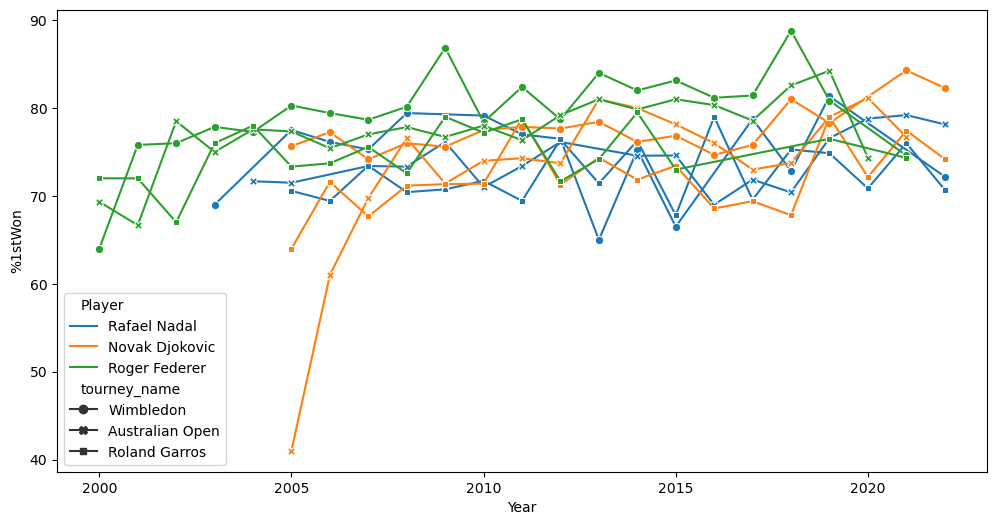

In [33]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=result_df, x='Year', y='%1stWon', hue='Player', style='tourney_name', markers=True, dashes=False)

## Separate Line Graphs for Each Tournament

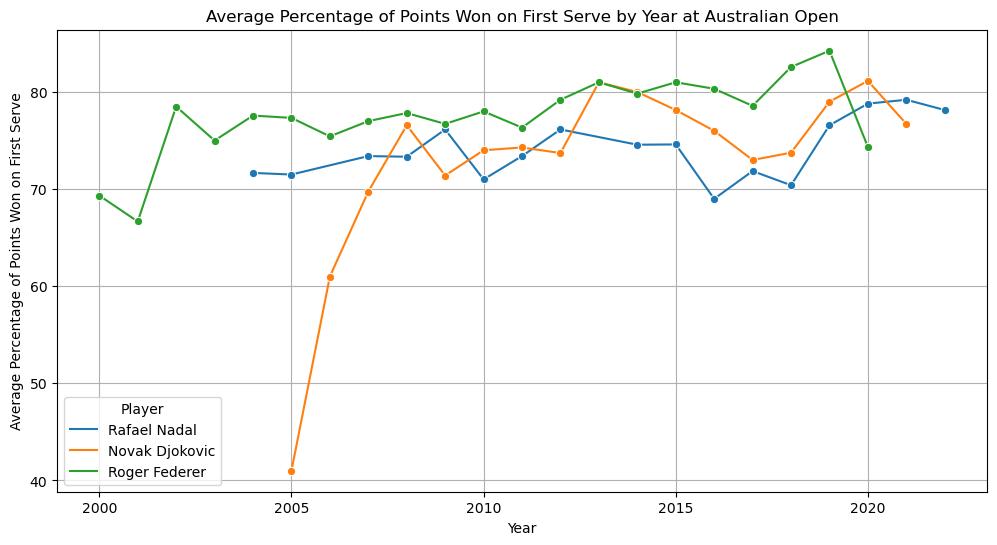

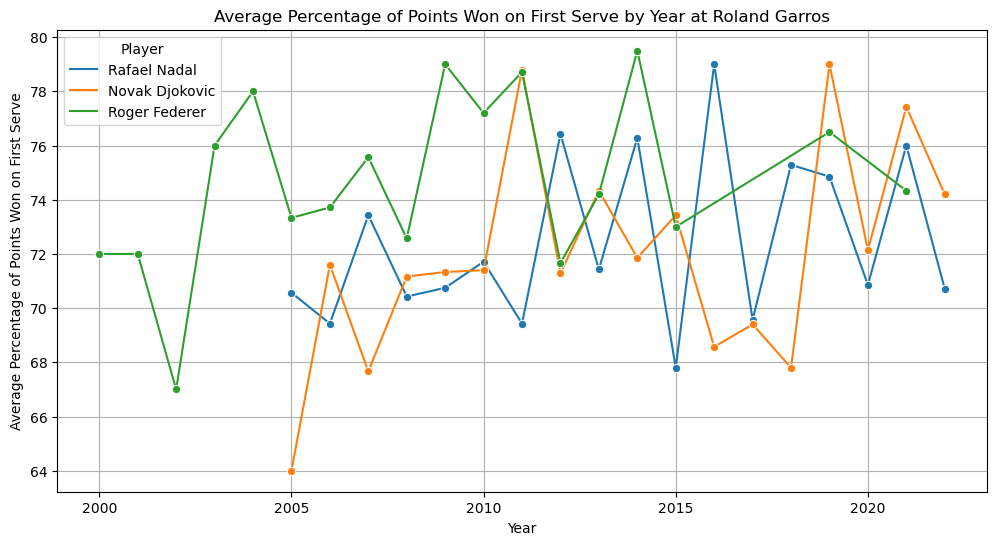

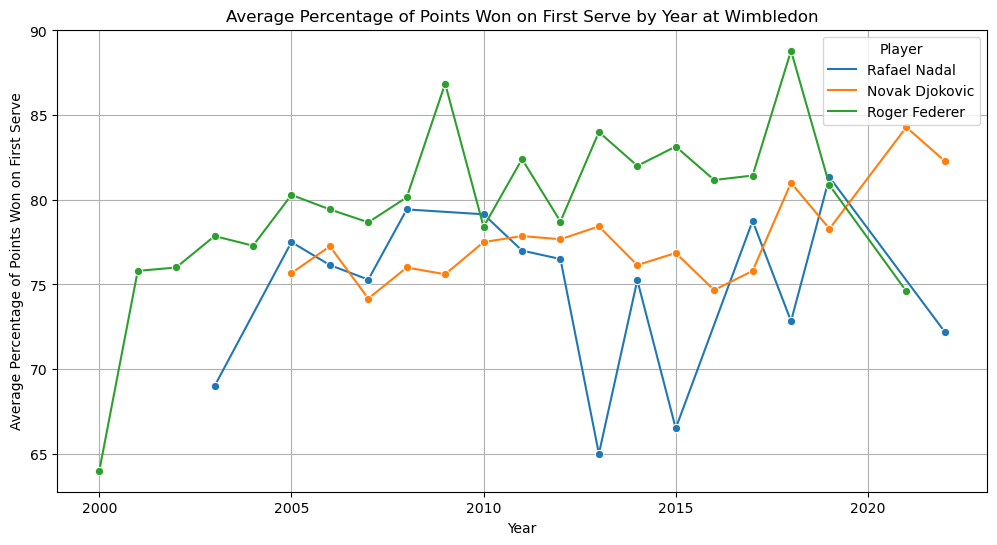

In [34]:
# Plot separate line graphs for each tournament
for tournament in tournaments:
    tournament_df = result_df[result_df['tourney_name'] == tournament]
    
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=tournament_df, x='Year', y='%1stWon', hue='Player', marker='o')
    
    # Customize the plot
    plt.title(f'Average Percentage of Points Won on First Serve by Year at {tournament}')
    plt.xlabel('Year')
    plt.ylabel('Average Percentage of Points Won on First Serve')
    plt.legend(title='Player')
    plt.grid(True)
    
    # Show the plot
    plt.show()

## Separate Bar Graphs for Each Tournament

In [35]:
# Define custom palette
palette = {'Roger Federer': 'yellowgreen', 'Rafael Nadal': 'darkorange', 'Novak Djokovic': 'blue'}

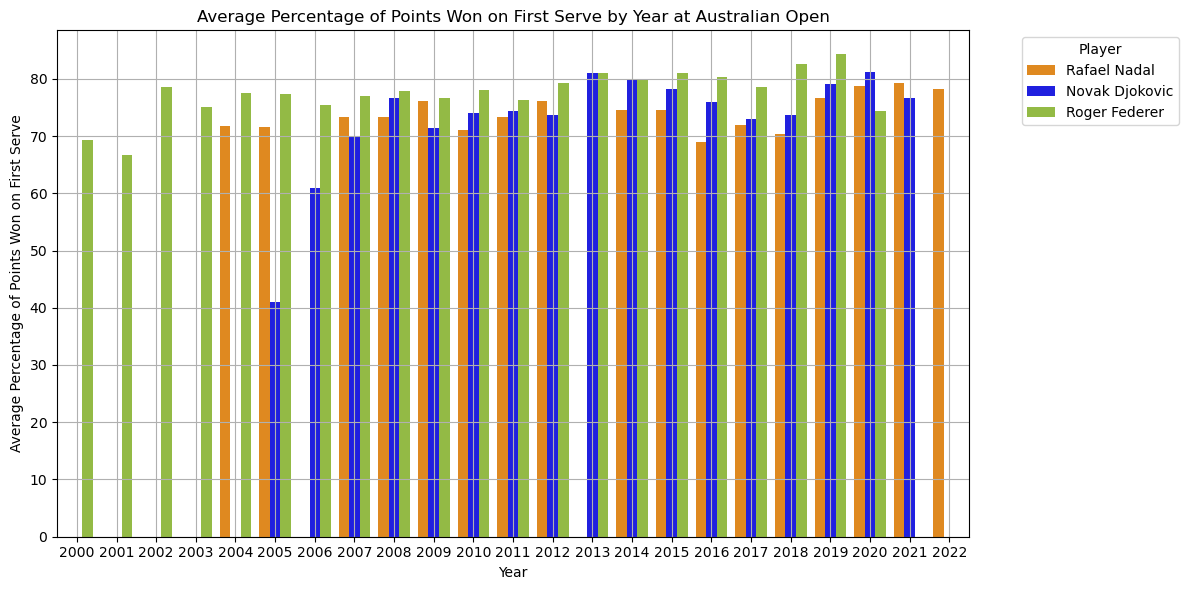

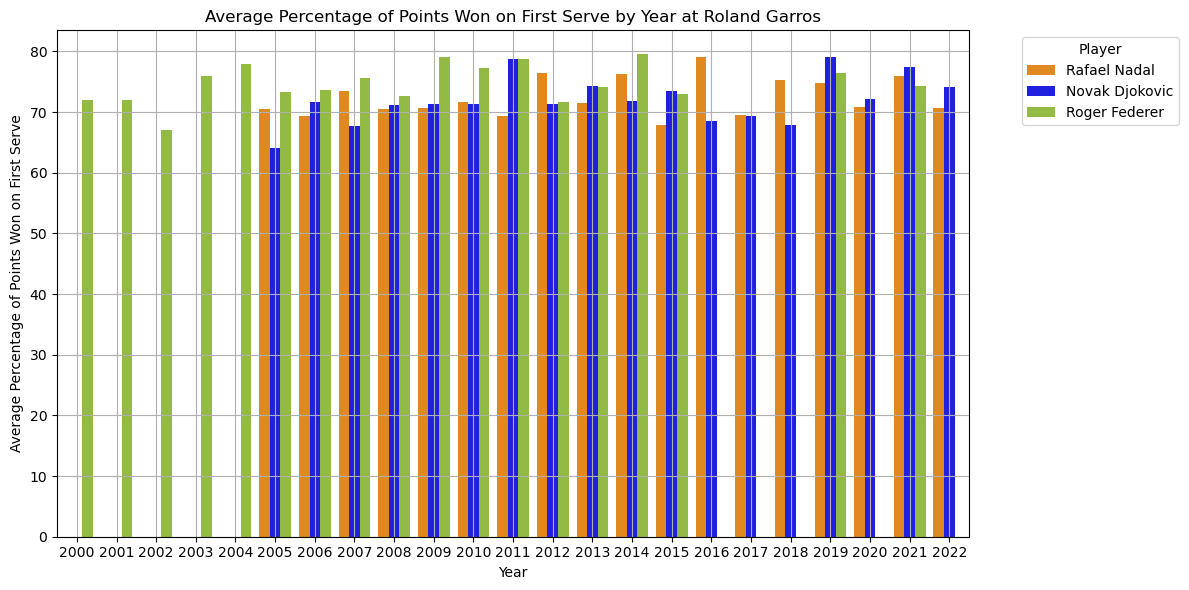

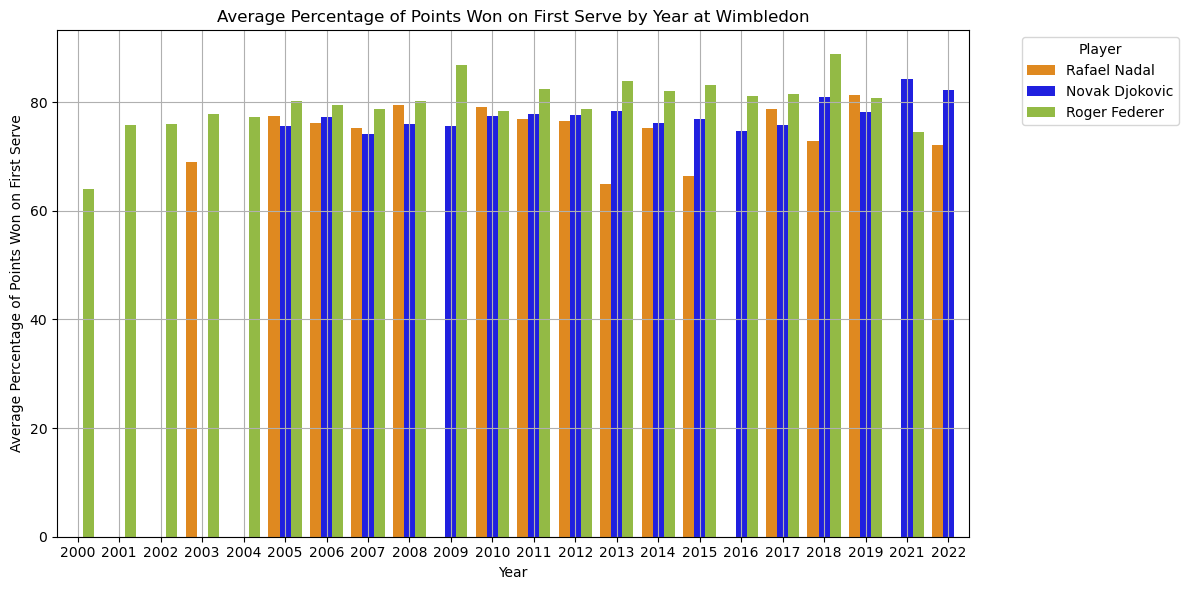

In [36]:
# Plot separate bar charts for each tournament
for tournament in tournaments:
    tournament_df = result_df[result_df['tourney_name'] == tournament]
    
    plt.figure(figsize=(12, 6))
    sns.barplot(data=tournament_df, x='Year', y='%1stWon', hue='Player', palette=palette)
    
    # Customize the plot
    plt.title(f'Average Percentage of Points Won on First Serve by Year at {tournament}')
    plt.xlabel('Year')
    plt.ylabel('Average Percentage of Points Won on First Serve')
    plt.legend(title='Player', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    
    # Show the plot
    plt.tight_layout()
    plt.show()

# 4. Export 'result_df'

In [37]:
#as pkl
result_df.to_pickle(os.path.join(path, 'Prepared Data','result_df.pkl'))

In [38]:
#as csv
#save df_matchstats as CSV
result_df.to_csv(os.path.join(path,'Prepared Data CSV','result_df.csv'))